In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

<AxesSubplot:ylabel='Density'>

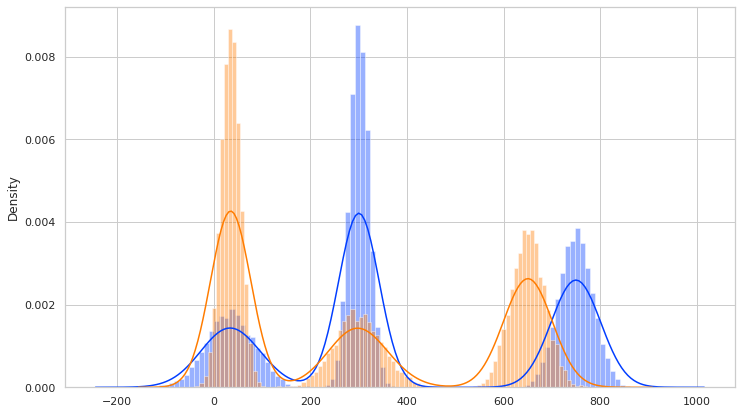

In [9]:
value1 = np.random.normal(loc=35,scale=50,size=5000)
value2 =  np.random.normal(loc=300,scale=20,size=10000)
value3 = np.random.normal(loc=750,scale=35,size=7500)
q1 = np.concatenate((value1,value2,value3))
value1 = np.random.normal(loc=300,scale=50,size=5000)
value2 =  np.random.normal(loc=35,scale=20,size=10000)
value3 = np.random.normal(loc=650,scale=35,size=7500)
q2 = np.concatenate((value1,value2,value3))
fig = plt.subplots(1,1,figsize = (12,7))
sns.distplot(q1,bins=100)
sns.distplot(q2,bins=100)

In [10]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm

In [11]:
print(best_gmmq1.get_params())
print(best_gmmq1.get_params())

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [12]:
print(best_gmmq1.means_)
print(best_gmmq2.means_)
print(best_gmmq1.weights_)
print(best_gmmq2.weights_)

[[300.22148811]
 [749.74070837]
 [ 34.41735073]]
[[ 34.66849192]
 [650.16371781]
 [299.21501805]]
[0.44452588 0.33333333 0.22214079]
[0.44443175 0.33333271 0.22223554]


## OrderbyMeans

In [13]:
means=[]
for i in range(len(best_gmmq1.means_)):
    means.append(best_gmmq1.means_[i][0])
x = dict(zip(means,best_gmmq1.weights_))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1

OrderedDict([(749.7407083653692, 0.3333333333333333),
             (300.2214881096939, 0.44452587521757475),
             (34.41735073456476, 0.22214079144909224)])

In [14]:
means=[]
for i in range(len(best_gmmq2.means_)):
    means.append(best_gmmq2.means_[i][0])
x = dict(zip(means,best_gmmq2.weights_))
od2 = collections.OrderedDict(sorted(x.items(),reverse=True))
od2

OrderedDict([(650.1637178148767, 0.3333327095221195),
             (299.21501805044596, 0.22223553969125295),
             (34.66849192253862, 0.4444317507866226)])

## OrderbyWeights

In [15]:
means=[]
for i in range(len(best_gmmq1.means_)):
    means.append(best_gmmq1.means_[i][0])
x = dict(zip(best_gmmq1.weights_,means))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1 = list(zip(list(od1.keys()),list(od1.values())))
od1

[(0.44452587521757475, 300.2214881096939),
 (0.3333333333333333, 749.7407083653692),
 (0.22214079144909224, 34.41735073456476)]

In [16]:
means=[]
for i in range(len(best_gmmq2.means_)):
    means.append(best_gmmq2.means_[i][0])
y = dict(zip(best_gmmq2.weights_,means))
od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
od2 = list(zip(list(od2.keys()),list(od2.values())))
od2

[(0.4444317507866226, 34.66849192253862),
 (0.3333327095221195, 650.1637178148767),
 (0.22223553969125295, 299.21501805044596)]

In [17]:
thres = 0.05
diffmean = []
diffweights = []
for i in range(len(od1)):
    diffmean.append(od1[i][1] - od2[i][1])
    diffweights.append(od1[i][0] - od2[i][0])        

In [18]:
print(diffmean)
print(diffweights)

[265.55299618715526, 99.5769905504925, -264.7976673158812]
[9.412443095213607e-05, 6.23811213795733e-07, -9.474824216071376e-05]
